Dr. Marques' Introduction to Data Science guest talk - Fall 2020

Step 2

**Improvements in this step**

1. Describe what the notebook is attempting to do
1. Organize into sections to make it easier to follow
1. Add EDA (exploratory data analysis) - What data do we have? Can we trust the data?
1. Explain what the code blocks are doing (the ones we added in this step)

**What stills need to be improved**

1. Make data clean-up more explicit
1. Explain what the code blocks are doing (the ones from the previous step)
1. Explain why certain numbers were chosen (what assumptions are behind them)
1. Make the graphs easier to read
1. Make the code more flexible with constants
1. Make the code more difficult to break
1. Describe limitations of the conclusion

-----------------

# Purpose

**REWORK NOTE**: clearly state the purpose of the notebook. Usually is the question we are trying to answer.

This notebook investigates the question "Is there gender discrimination in the salaries of an organization?"

To answer the question, it assumes that people in the same position, performing at the same level, should have comparable salaries, independent of their gender.

# Exploratory data analysis

**REWORK NOTE**: make use of section headers and sub-headers to help the reader follow the notebook.

This section reviews the data available for the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
salaries = pd.read_csv("data/salaries.csv")

## What data do we have?

**REWORK NOTE**: major changes to the notebook start here. The previous version didn't do any exploratory analysis, just started using the dataset. That's usually a bad idea. We need to understand the dataset first.

Columns in the dataset:

In [3]:
salaries.columns

Index(['earn', 'height', 'sex', 'ed', 'age', 'race'], dtype='object')

The dataset has these pieces of information for each employee:

1. `earn`: the annual salary
1. `height`: the height in inches
1. `sex`: the gender
1. `ed`: number of years of education
1. `age`: age in years
1. `race`: the race

## Can we trust the data?

### Are there empty values?

In [4]:
print(salaries.isnull().sum())

earn      0
height    0
sex       0
ed        0
age       0
race      0
dtype: int64


All values are present

### Do the columns have the correct data type?

In [5]:
print(salaries.dtypes)

earn      float64
height    float64
sex        object
ed          int64
age         int64
race       object
dtype: object


The columns have the correct data type.

### Do the numeric values make sense?

In [6]:
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


There indications of possible issues with the numeric values:

1. `earn`: minimum salary is low, doesn't seem to be a valid annual salary.
1. `ed`:  very low years of education in some cases. They may be correct, but they may skew the analysis.
1. `age`: there are some large values for age. They may be correct, but they may skew the analysis.

We will check them in more details later.

### Do the categorical values make sense?

Does the `sex` columns make sense?

In [7]:
salaries.sex.unique()

array(['male', 'female'], dtype=object)

The values are the expected ones (we are assuming the standard binary genre identification - in real-life we should check with human resources if this task is about biological gender or if we should consider non-traditional genders, in which case the dataset may be wrong).

Does the `race` column make sense?

In [8]:
salaries.race.unique()

array(['white', 'other', 'hispanic', 'black'], dtype=object)

The values seem correct (we are missing some races, e.g. "asian" - in real life we should stop here and ask human resources if this is what they would expect to see in the data).

**REWORK NOTE**: major changes to the notebook end here. From this point on the changes are minor, e.g. add section headers.

# Data clean-up

In [9]:
salaries = salaries[salaries.earn >= 14500]
salaries = salaries[salaries.age < 66]
salaries = salaries[salaries.ed >= 12]

Now that the dataset is cleaned up, we need to check if both genders are similarly represented. A gender-skewed dataset is still useful for the analysis, but makes it more difficult.

In [10]:
print(
    "The dataset has {} female and {} male samples".format(
        len(salaries[salaries.sex == "female"]), len(salaries[salaries.sex == "male"])
    )
)

The dataset has 342 female and 341 male samples


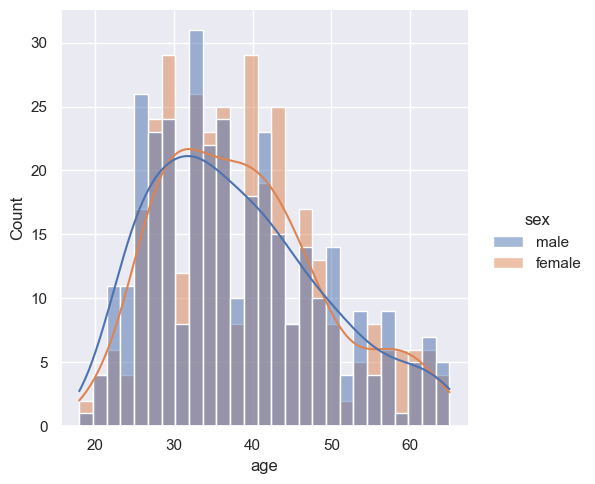

In [11]:
sns.displot(salaries, x="age", hue="sex", bins="sqrt", kde=True)

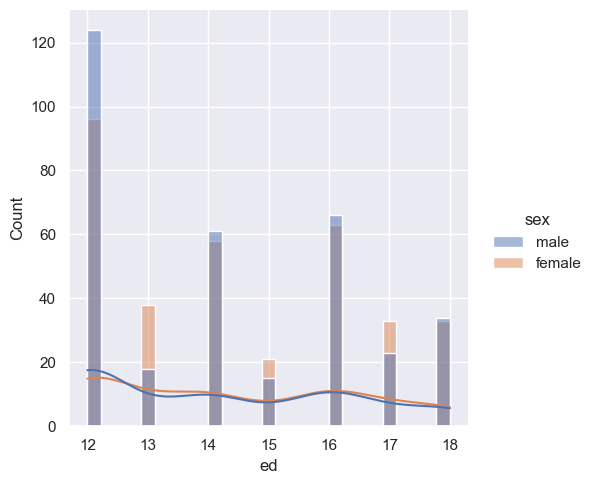

In [12]:
sns.displot(salaries, x="ed", hue="sex", bins="sqrt", kde=True)

# Analysis

We will start with an overview of the relationships among the features (columns), split by sex.

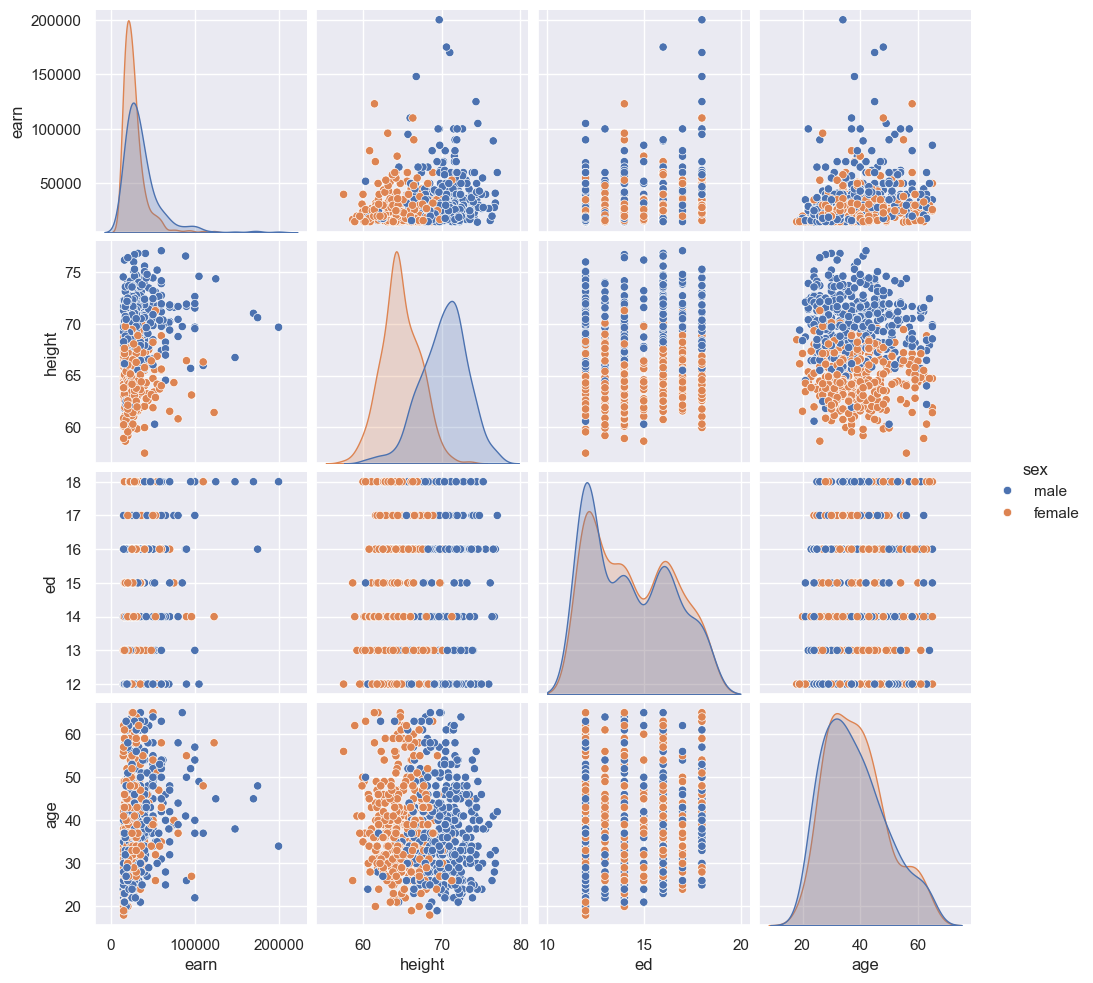

In [13]:
sns.pairplot(salaries, hue="sex")

In [14]:
salaries.groupby(["sex", "race"]).size().unstack()

race,black,hispanic,other,white
sex,,,,
female,36,17,8,281
male,25,19,7,290


## Analyzing experience

<Axes: xlabel='age', ylabel='earn'>

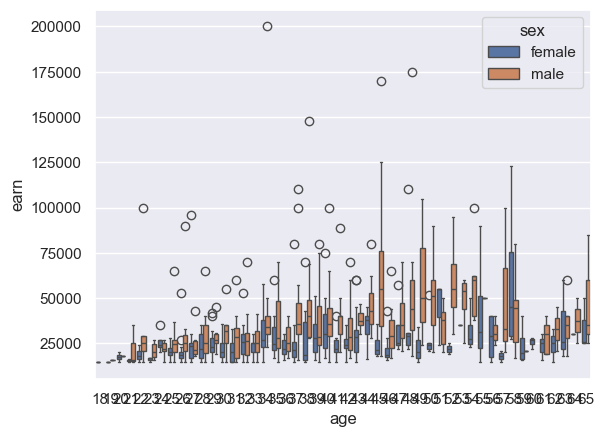

In [15]:
sns.boxplot(data=salaries, x="age", y="earn", hue="sex")

This plot shows that females earn less on average. More importantly, females earn less in all quartiles and have fewer outliers in the fourth quartile (the higher end of salaries).

## Analyzing education level

<Axes: xlabel='ed', ylabel='earn'>

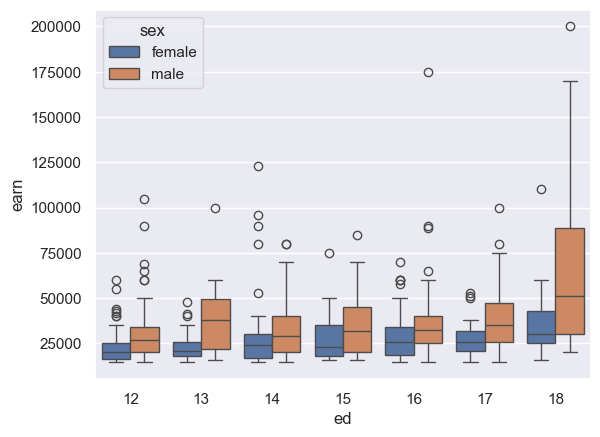

In [16]:
sns.boxplot(data=salaries, x="ed", y="earn", hue="sex")

This plot also shows that females earn less than males on average, and again the quartiles are lower for females.

## Excluding low salaries

In [17]:
salaries.earn.describe()

count       683.000000
mean      31867.506589
std       20239.320668
min       14500.000000
25%       20000.000000
50%       26000.000000
75%       35000.000000
max      200000.000000
Name: earn, dtype: float64

<Axes: xlabel='age', ylabel='earn'>

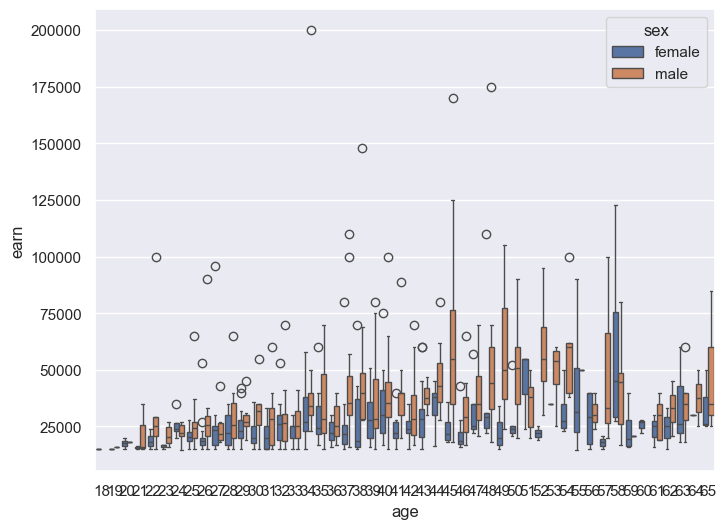

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries[salaries.earn >= 14500], x="age", y="earn", hue="sex")

<Axes: xlabel='ed', ylabel='earn'>

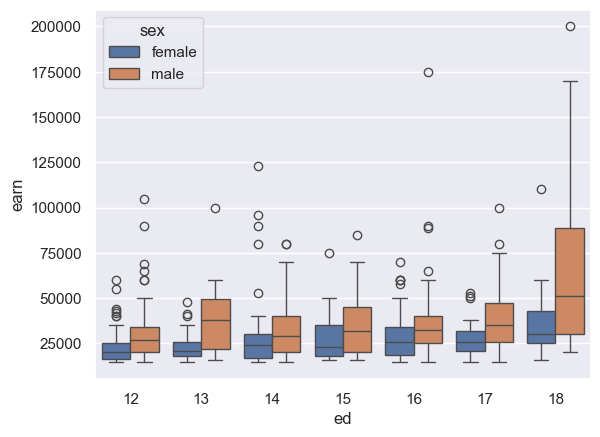

In [19]:
sns.boxplot(data=salaries[salaries.earn >= 14500], x="ed", y="earn", hue="sex")

After we exclude the lower salaries, we end up with the same picture: females are paid less on average and in general.

# Conclusions

We collected enough evidence to point to potential gender discrimination in salaries at this company:

- For the same age level, females make less on average and in general (all quartiles).
- For the same education level, females again make less on average and in general.